<a href="https://colab.research.google.com/github/simodepth96/analytics-/blob/main/Correlation_%26_Covariance_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Correlation and Covariance

Correlation and Covariance measure the strength of a linear distribution (with non-zero slopes) between two quantitative variables

**with non-zero slopes** = the distribution is measured following only a straight line. It doesn't account for bell-shaped distributions (e.g Gaussian's)

#Limitations
There are some **limitations** to using correlation or covariance as a way of assessing whether there is an association between two variables.

Because correlation and covariance both measure the strength of linear relationships with non-zero slopes, but not other kinds of relationships, correlation can be misleading.

For example, the four scatter plots below all show pairs of variables with near-zero correlations. 

The bottom left image shows an example of a perfect linear association where the slope is zero (the line is horizontal). Meanwhile, the other three plots show non-linear relationships — if we drew a line through any of these sets of points, that line would need to be curved, not straight!
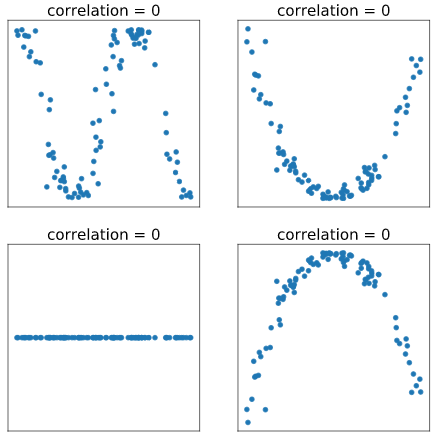

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/japan GSC.xlsx')
#df = pd.DataFrame(baseline,columns=['Address','Status Code','Clicks','Impressions','CTR','Position','Summary'])
#df = df.fillna(0)
#df.isnull().sum()
df.head()

,URL,Clicks,Impressions,CTR,Position
0,https://www.boucheron.com/ja_jp/jewelry/jewelr...,17933,101494,0.176690,13.721511
1,https://www.boucheron.com/ja_jp/bridal/all-bri...,14004,89652,0.156204,7.683978
2,https://www.boucheron.com/ja_jp/,13471,88288,0.152580,25.721129
3,https://www.boucheron.com/ja_jp/jewelry/jewelr...,5686,60769,0.093567,4.305057
4,https://www.boucheron.com/ja_jp/jewelry/jewelr...,5097,21266,0.239678,5.225806


In [ ]:
df['Clicks'] = df['Clicks'].astype(int)
df['Impressions'] = df['Impressions'].astype(int)
df['URL CTR'] = df['URL CTR'].astype(int)
df['Average Position'] = df['Average Position'].round(0).astype(int)
df.head(10)

,Landing Page,Url Clicks,Impressions,URL CTR,Average Position
0,https://www.boucheron.com/ja_jp/jewelry/jewelr...,17933,101494,0,14
1,https://www.boucheron.com/ja_jp/bridal/all-bri...,14004,89652,0,8
2,https://www.boucheron.com/ja_jp/,13471,88288,0,26
3,https://www.boucheron.com/ja_jp/jewelry/jewelr...,5686,60769,0,4
4,https://www.boucheron.com/ja_jp/jewelry/jewelr...,5097,21266,0,5
5,https://www.boucheron.com/ja_jp/jewelry/jewelr...,3819,68676,0,3
6,https://www.boucheron.com/ja_jp/jewelry/jewelr...,2921,17156,0,3
7,https://www.boucheron.com/ja_jp/jewelry/jewelr...,1063,42141,0,4
8,https://www.boucheron.com/ja_jp/clou-de-paris-...,905,7622,0,8
9,https://www.boucheron.com/ja_jp/neo-pivoine-ri...,724,2241,0,3


In [ ]:
#@title Logistic Regression Preprocessing: Coding Categorical Variables 
#first we define a function to code values
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded

#now we apply the funtion on a selected variables (e.g we want to encode Indexability) which we'll encode w/ 0 and 1 
df["Summary_Coded"] = coding(df["Summary"], {'URL is on Google':0,'URL is not on Google':1})


In [ ]:
#next we drop the original Indexability column as we won't need it for the purpose of Logistic Regressin 
trimmed = df.drop(['URL',	'CTR'], axis=1)
trimmed.head()

,Clicks,Impressions,Position
0,17933,101494,13.721511
1,14004,89652,7.683978
2,13471,88288,25.721129
3,5686,60769,4.305057
4,5097,21266,5.225806


In [ ]:
#@title Calculate Correlation using the Pearson library
from scipy.stats import pearsonr


# calculate corr_sqfeet_beds and print it out:
correlation , p = pearsonr(df.Position, df.Clicks)
correlation

0.009764286110940441

In [ ]:
#@title Calculate Correlation using the Pandas library
corr = trimmed.corr()
corr

,Clicks,Impressions,Position
Clicks,1.000000,0.853657,0.009764
Impressions,0.853657,1.000000,-0.034966
Position,0.009764,-0.034966,1.000000


<Axes: >

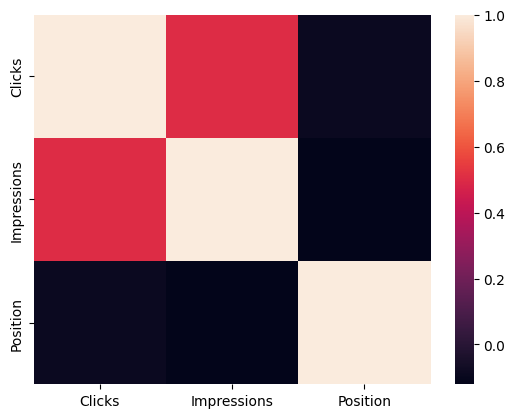

In [ ]:
sns.heatmap(corr)

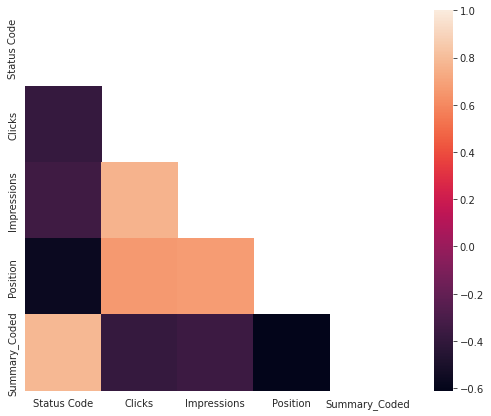

In [ ]:
#@title Trigger the focus on the Heatmap findings with a **Diagonal correlation matrix**
# it's a mirror image of the other part, so it will help us focus more on the data by looking at one facet

import numpy as np
import seaborn as sns

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10,7))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)

It seems **Position engages with Clicks and Impressions** to some extent. 

We're going to dig deeper by plotting a scatterplot drilled on the relationship between Position - Clicks and Position - Impressions

#Explore the Covariance

**Covariance is a summary statistic that describes the strength of a linear relationship**. A linear relationship is one where a straight line would best describe the pattern of points in a scatter plot.
Covariance can range from negative infinity to positive infinity.

A positive covariance indicates that a larger value of one variable is associated with a larger value of the other. 

A negative covariance indicates a larger value of one variable is associated with a smaller value of the other.

 A covariance of 0 indicates no linear relationship. 


In [ ]:
covariance = np.cov(df.Impressions, df.Clicks)
print(covariance)

[[47566386.22678233  5287675.37065028]
 [ 5287675.37065028   806607.35254459]]


A positive covariance indicates that a larger value of one variable is associated with a larger value of the other.

**In this case, the difference between the off-diagonal values is very small and slighlty intertwined. The relationship is weak**

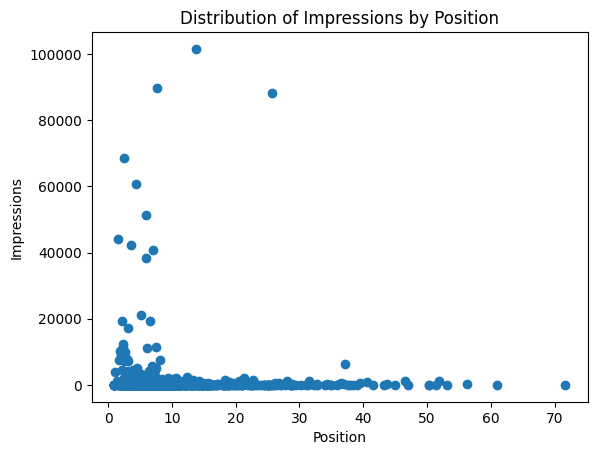

In [ ]:
#@title Explore Correlation Position vs Impressions w/ Scatterplot

import seaborn as sns

plt.scatter('Position', 'Impressions', data=df)
plt.xlabel('Position')
plt.ylabel('Impressions')
plt.title('Distribution of Impressions by Position')
plt.show()

In [ ]:
correlation , p = pearsonr(df.Impressions, df.Position)
correlation

-0.03496571568936421

In [ ]:
covariance = np.cov(df.Impressions, df.Position)
print(covariance)

[[ 4.75663862e+07 -2.02626305e+03]
 [-2.02626305e+03  7.06003163e+01]]


Covariance herewith the script suggests Position and Impressions are **negatively correlated** and the **strength of correlation is very small**

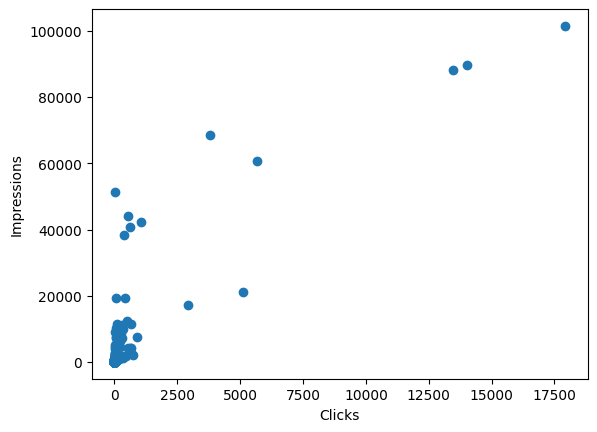

In [ ]:
#@title Explore Correlation Clicks vs Impressions w/ Scatterplot

import seaborn as sns

plt.scatter('Clicks', 'Impressions', data=df)
plt.xlabel('Clicks')
plt.ylabel('Impressions')
plt.show()

In [ ]:
correlation , p = pearsonr(df.Impressions, df.Clicks)
correlation

0.8536574153733153

In [ ]:
X = df.Impressions
Y = df.Clicks

In [ ]:
X.shape, Y.shape

((25,), (25,))

In [ ]:
!pip install scikit-learn 
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((20,), (20,))

In [ ]:
X_test.shape, Y_test.shape

((5,), (5,))

#Linear Regression Model

In [ ]:
#@title Import Libraries
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
#@title Build linear regression

model = linear_model.LinearRegression()


In [ ]:
model.fit(X_train, Y_train)

ValueError: ignored